# Weather data Visualization using Matplotlib 


Data Source:
[Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) 

Each row in the datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

This project contains:

1. Reading the documentation and familiarizing with the dataset, then writing some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day is be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from Alberto Cairo and Edward tufty's principles. Consider issues such as legends, labels, and chart junk.

The data is near **Ann Arbor, Michigan, United States**

In [35]:
import matplotlib.pyplot as plt
import folium # used to map the location of various stations from where data has been taken
import pandas as pd

In [65]:
def leaflet_plot_stations( hashid):

    df = pd.read_csv('../Dataset/weather_viz/station.csv')

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))
    mapit = folium.Map( location=[lats[0],lons[0]], zoom_start=6 )
#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    for i,j in zip(lats,lons):
        folium.Marker( location=[ i,j ], fill_color='#43d9de', radius=8 ).add_to( mapit )
    return mapit
    

leaflet_plot_stations('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [6]:
import numpy as np
%matplotlib notebook #backend for ini browser rendering of plotting library

In [62]:
df = pd.read_csv('../Dataset/weather_viz/weather.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [10]:
df_sorted_i = df.sort_values(by = ['Date'])
df_sorted = df_sorted_i[~(pd.to_datetime(df_sorted_i.Date).dt.year ==2015)]
df_sorted.head()

In [12]:
grouped = df_sorted.groupby(['Date','Element'])
max_temp = grouped['Data_Value'].agg(max)
min_temp = grouped['Data_Value'].agg(min)

In [13]:
dates = pd.to_datetime(max_temp[:,'TMAX'].index)

In [14]:
tmax = max_temp[:,'TMAX'].values
tmin = min_temp[:,'TMIN'].values
tmax.shape

<IPython.core.display.Javascript object>


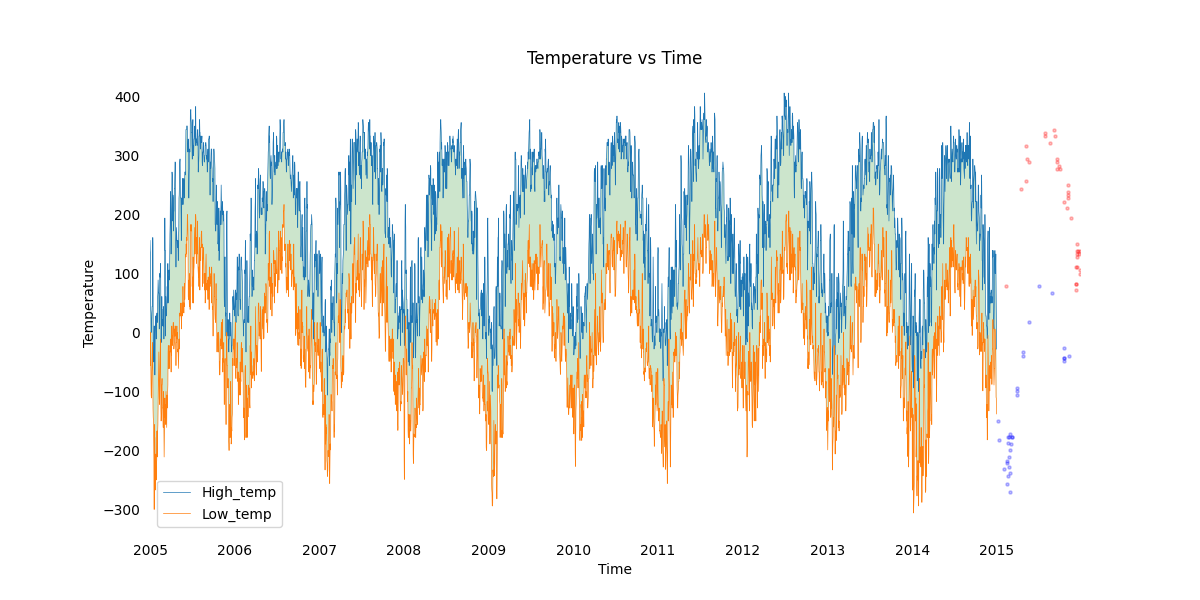

In [16]:
ax = plt.figure(figsize=(12,6))
plt.plot(dates, tmax, linewidth = 0.5,  alpha = 1)
plt.plot(dates, tmin,linewidth = 0.5)
plt.box(False)
plt.tick_params(bottom = False, top = False, left = False, right = False)
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.title("Temperature vs Time")
plt.xlim([dates[0], dates[-1]])
plt.gca().fill_between(dates, tmax, tmin, facecolor = 'g',alpha = 0.2)
plt.legend(['High_temp', 'Low_temp'])
plt.show()

In [17]:
new_df = df_sorted[~((pd.to_datetime(df_sorted.Date).dt.month ==2) & (pd.to_datetime(df_sorted.Date).dt.day == 29))]
data_2015 = df_sorted_i[pd.to_datetime(df_sorted_i.Date).dt.year == 2015] 
data_rest = new_df
g_rest = data_rest.groupby([pd.to_datetime(data_rest.Date).dt.month, pd.to_datetime(data_rest.Date).dt.day, 'Element'])
g = data_2015.groupby([pd.to_datetime(data_2015.Date).dt.month, pd.to_datetime(data_2015.Date).dt.day, 'Element'])

In [18]:
max_t_rest = g_rest['Data_Value'].agg(max)
min_t_rest = g_rest['Data_Value'].agg(min)
max_t = g['Data_Value'].agg(max)
min_t = g['Data_Value'].agg(min)
max_rest = max_t_rest[:,:,'TMAX']
max_2015 = max_t[:,:,'TMAX']
min_rest = min_t_rest[:,:,'TMIN']
min_2015 = min_t[:,:,'TMIN']

In [19]:
s_max = []
s_min = []
for value1,value2,idx in zip(min_rest,min_2015,min_2015.index):
    if(value1>value2):
        s_min.append([pd.to_datetime('2015-'+str(idx[0])+'-'+str(idx[1])), value1])
for value1,value2,idx in zip(max_rest,max_2015,max_2015.index):
    if(value1<value2):
        s_max.append([pd.to_datetime('2015-'+str(idx[0])+'-'+str(idx[1])), value1])


In [20]:
s_max = pd.DataFrame(s_max, columns = ['Date',"Value"]).set_index('Date')
s_min = pd.DataFrame(s_min, columns = ['Date',"Value"]).set_index('Date')

In [21]:
plt.scatter(s_max.index, s_max['Value'], color = 'r',  alpha = 0.25, s = 5)
plt.scatter(s_min.index, s_min['Value'], color = 'b',  alpha =0.25, s = 5)
plt.autoscale(enable=True, axis='x', tight=True)